# Dataset Column Descriptions

## 1. Time and Location
- **Timestamp** – The date and time of the recorded data.
- **Latitude** & **Longitude** – The geographical coordinates where the data was collected.

## 2. Traffic Metrics
- **Vehicle_Count** – The number of vehicles detected in a given area at the recorded time.
- **Traffic_Speed_kmh** – The average speed of vehicles in kilometers per hour.
- **Road_Occupancy_%** – The percentage of road space occupied by vehicles.

## 3. Traffic Control and Conditions
- **Traffic_Light_State** – The state of the traffic light at that location (e.g., Red, Green).
- **Weather_Condition** – The weather at the time of data collection (e.g., Fog, Snow, Clear).
- **Traffic_Condition** – A categorical label indicating traffic congestion levels (e.g., High, Low).

## 4. Incidents and Reports
- **Accident_Report** – A binary value indicating whether an accident was reported (1 for an accident, 0 for no accident).
- **Sentiment_Score** – A numerical score representing public sentiment, possibly from social media or reports.

## 5. Transportation and Environmental Factors
- **Ride_Sharing_Demand** – The number of ride-sharing requests in that area.
- **Parking_Availability** – The number of available parking spots.
- **Emission_Levels_g_km** – The level of emissions (grams per kilometer) recorded.
- **Energy_Consumption_L_h** – The amount of energy consumption, likely in liters per hour.


In [217]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [218]:
df = pd.read_csv('smart_mobility_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               5000 non-null   object 
 1   Latitude                5000 non-null   float64
 2   Longitude               5000 non-null   float64
 3   Vehicle_Count           5000 non-null   int64  
 4   Traffic_Speed_kmh       5000 non-null   float64
 5   Road_Occupancy_%        5000 non-null   float64
 6   Traffic_Light_State     5000 non-null   object 
 7   Weather_Condition       5000 non-null   object 
 8   Accident_Report         5000 non-null   int64  
 9   Sentiment_Score         5000 non-null   float64
 10  Ride_Sharing_Demand     5000 non-null   int64  
 11  Parking_Availability    5000 non-null   int64  
 12  Emission_Levels_g_km    5000 non-null   float64
 13  Energy_Consumption_L_h  5000 non-null   float64
 14  Traffic_Condition       5000 non-null   

In [219]:
#splitting the data into training and testing
df1 = df.sample(frac=0.8, random_state=42)
df2 = df.drop(df1.index)
df2_labels = df2['Traffic_Condition']  # Save the target variable
df2.drop('Traffic_Condition', axis=1, inplace=True)  # Remove it only for inference
df1.shape, df2.shape    

((4000, 15), (1000, 14))

In [220]:
df1.to_csv('train.csv', index=False)
df2.to_csv('test.csv', index=False)
df2_labels.to_csv('test_labels.csv', index=False)

In [221]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [222]:
train.isna().sum(),'-'*50,train.duplicated().sum()

(Timestamp                 0
 Latitude                  0
 Longitude                 0
 Vehicle_Count             0
 Traffic_Speed_kmh         0
 Road_Occupancy_%          0
 Traffic_Light_State       0
 Weather_Condition         0
 Accident_Report           0
 Sentiment_Score           0
 Ride_Sharing_Demand       0
 Parking_Availability      0
 Emission_Levels_g_km      0
 Energy_Consumption_L_h    0
 Traffic_Condition         0
 dtype: int64,
 '--------------------------------------------------',
 0)

In [223]:
train.describe(),'*'*50,train.describe(include='object')

(          Latitude    Longitude  Vehicle_Count  Traffic_Speed_kmh  \
 count  4000.000000  4000.000000    4000.000000        4000.000000   
 mean     40.748835   -73.847722     153.726000          42.069317   
 std       0.086012     0.086477      83.613685          21.703670   
 min      40.600016   -73.999987      10.000000           5.002789   
 25%      40.675111   -73.919672      80.000000          23.122788   
 50%      40.746721   -73.846518     155.000000          42.093310   
 75%      40.824879   -73.772278     226.000000          60.621699   
 max      40.899972   -73.700159     299.000000          79.997556   
 
        Road_Occupancy_%  Accident_Report  Sentiment_Score  \
 count       4000.000000      4000.000000      4000.000000   
 mean          54.524318         0.100000        -0.008052   
 std           26.218455         0.300038         0.584243   
 min           10.005031         0.000000        -0.999819   
 25%           31.901270         0.000000        -0.503422

In [224]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               4000 non-null   object 
 1   Latitude                4000 non-null   float64
 2   Longitude               4000 non-null   float64
 3   Vehicle_Count           4000 non-null   int64  
 4   Traffic_Speed_kmh       4000 non-null   float64
 5   Road_Occupancy_%        4000 non-null   float64
 6   Traffic_Light_State     4000 non-null   object 
 7   Weather_Condition       4000 non-null   object 
 8   Accident_Report         4000 non-null   int64  
 9   Sentiment_Score         4000 non-null   float64
 10  Ride_Sharing_Demand     4000 non-null   int64  
 11  Parking_Availability    4000 non-null   int64  
 12  Emission_Levels_g_km    4000 non-null   float64
 13  Energy_Consumption_L_h  4000 non-null   float64
 14  Traffic_Condition       4000 non-null   

In [225]:
train['Timestamp'] = pd.to_datetime(train['Timestamp']) #converting to datetime
train['Timestamp'] = train['Timestamp'].astype('int64') // 10**9 #converting to unix timestamp
train['Timestamp'].sample(5)

418     1710279900
303     1709672700
3565    1709564100
1858    1709947500
928     1709517300
Name: Timestamp, dtype: int64

In [226]:
train['Traffic_Light_State'] = train['Traffic_Light_State'].map({'Yellow':3, 'Green':2, 'Red':1}).astype(int) #mapping the traffic light state
train['Weather_Condition'] = train['Weather_Condition'].map({'Snow':3, 'Fog':2, 'Clear':1, 'Rain':0}).astype(int) #mapping the weather condition
train['Traffic_Condition'] = train['Traffic_Condition'].map({'Low':0, 'High':2, 'Medium':1}).astype(int) #mapping the traffic condition

In [227]:
train['Traffic_Condition'].sample(5)

1626    2
2815    2
1600    2
125     2
2694    2
Name: Traffic_Condition, dtype: int32

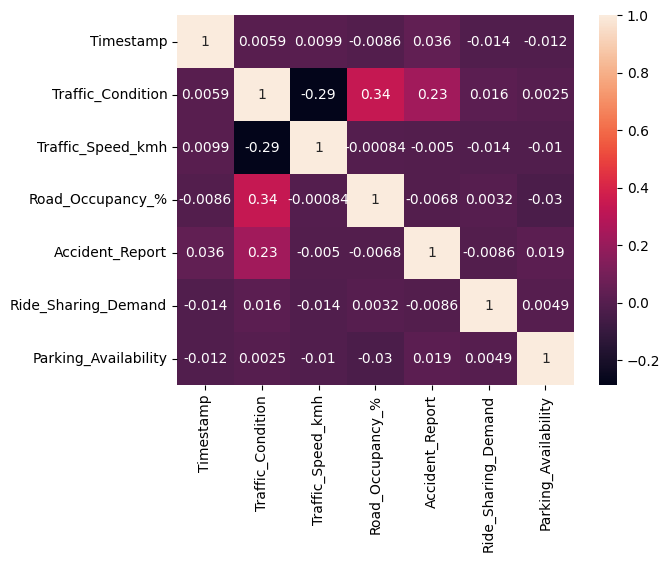

In [228]:
#heatmap
sns.heatmap(train[['Timestamp','Traffic_Condition','Traffic_Speed_kmh','Road_Occupancy_%','Accident_Report','Ride_Sharing_Demand','Parking_Availability']].corr(),annot=True)
plt.show()

C:\Users\20101\AppData\Local\Temp\ipykernel_23544\148631333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x="Traffic_Condition", y="Road_Occupancy_%", palette="Set2", ax=axes[0])
C:\Users\20101\AppData\Local\Temp\ipykernel_23544\148631333.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\20101\AppData\Local\Temp\ipykernel_23544\148631333.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x="Traffic_Condition", y="Traffic_Speed_kmh", palette="Set2", ax=axes[1])
C:\Users\20101\AppData\Local\Temp\ipykernel

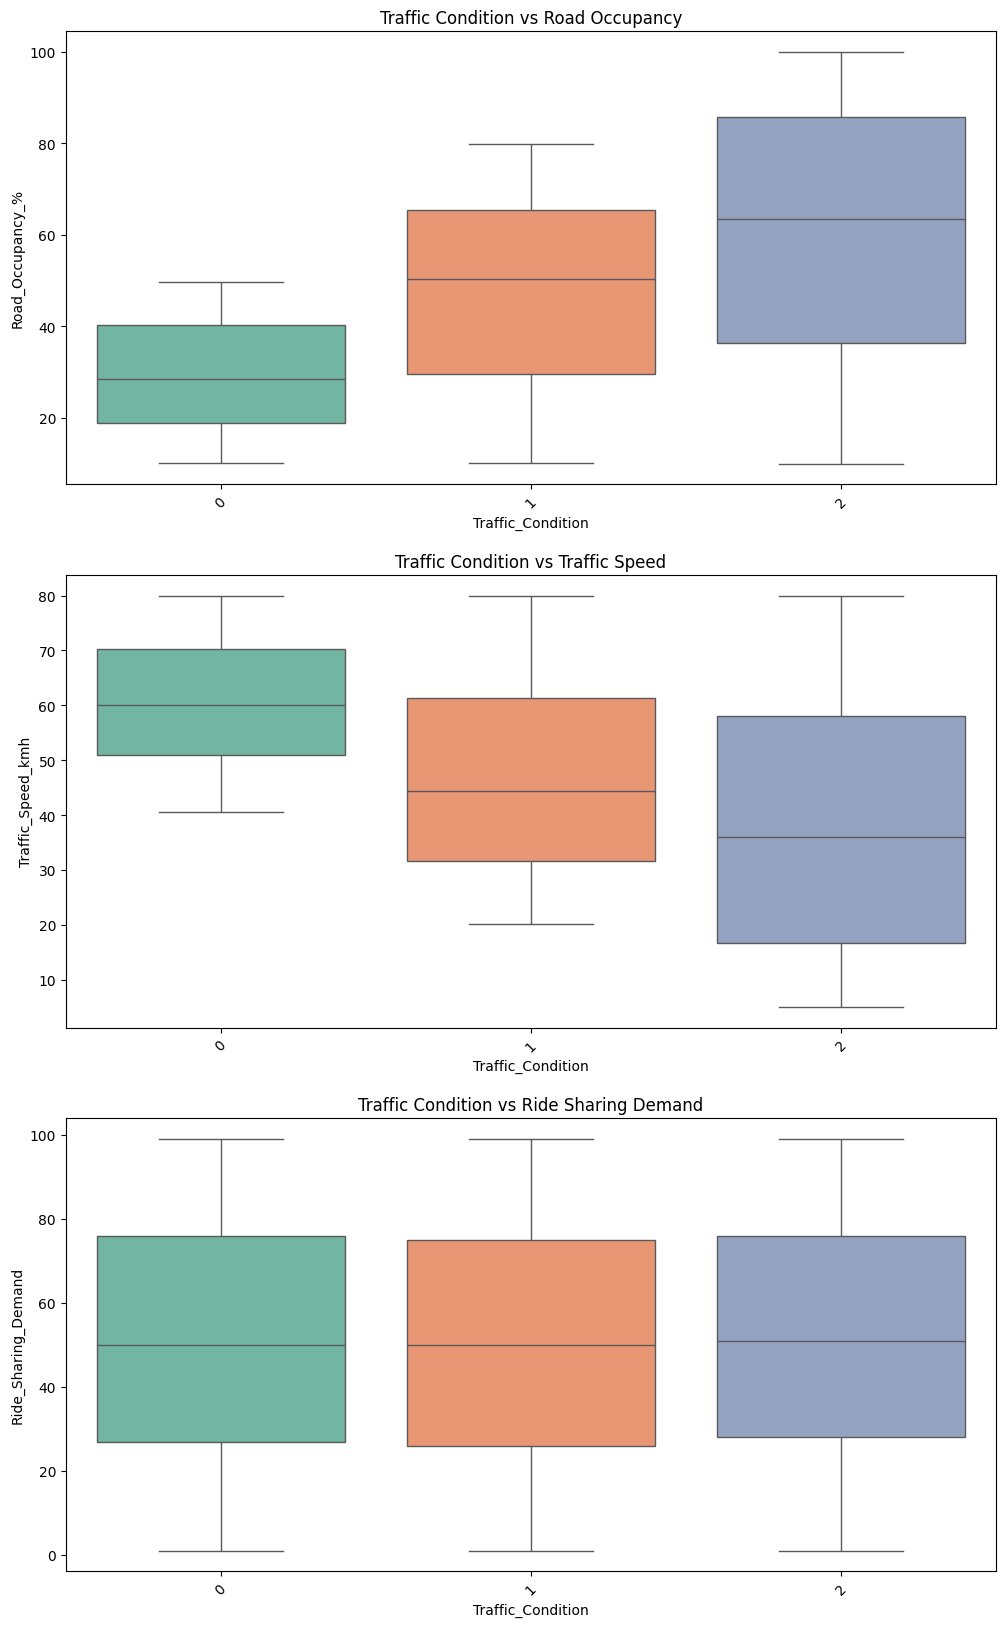

In [229]:
fig, axes = plt.subplots(3,1, figsize=(12, 20))
#boxplot for Traffic Condition vs Road Occupancy
sns.boxplot(data=train, x="Traffic_Condition", y="Road_Occupancy_%", palette="Set2", ax=axes[0])
axes[0].set_title("Traffic Condition vs Road Occupancy")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
#boxplot for Traffic Condition vs Traffic Speed
sns.boxplot(data=train, x="Traffic_Condition", y="Traffic_Speed_kmh", palette="Set2", ax=axes[1])
axes[1].set_title("Traffic Condition vs Traffic Speed")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
#boxplot for Traffic Condition vs Ride Sharing Demand
sns.boxplot(data=train, x="Traffic_Condition", y="Ride_Sharing_Demand", palette="Set2", ax=axes[2])
axes[2].set_title("Traffic Condition vs Ride Sharing Demand")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
plt.show()

In [230]:
X = train.drop(['Traffic_Condition'], axis=1) # Define features (X)
y = train['Traffic_Condition'] # Define the target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Split the data into training and testing sets
model = RandomForestClassifier(n_estimators=100, random_state=42) # Initialize the Random Forest classifier with 100 trees
model.fit(X_train, y_train) # Train the model on the training data

RandomForestClassifier(random_state=42)

In [231]:
predictions = model.predict(X_test) # Make predictions on the test data
accuracy_score(y_test, predictions) # Calculate and print the accuracy of the model

0.9983333333333333

In [232]:
def all(models, X_train, y_train, X_test, y_test):
    accuracies = []
    for model in models:  # Looping over models inside the function
        model.fit(X_train, y_train)  # Train the model
        pred = model.predict(X_test)  # Predict on the test data
        accuracy = accuracy_score(y_test, pred)  # Calculate accuracy of model
        print(f"Accuracy of {model.__class__.__name__}: {accuracy}")
        accuracies.append(accuracy)  # Store the accuracy in the list
    return accuracies

In [233]:
# Define a list of models to evaluate
models = [
    RandomForestClassifier(),
    LogisticRegression(max_iter=1000),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC()
]
accuracies = all(models, X_train, y_train, X_test, y_test) # Evaluate the models and get their accuracies
new_data = pd.DataFrame({
    'Model': [model.__class__.__name__ for model in models],
    'Accuracy': accuracies
})
new_data # Print the DataFrame

Accuracy of RandomForestClassifier: 0.9975
Accuracy of LogisticRegression: 0.64
Accuracy of GradientBoostingClassifier: 1.0
Accuracy of KNeighborsClassifier: 0.5558333333333333
Accuracy of GaussianNB: 0.8
Accuracy of SVC: 0.64


,Model,Accuracy
0,RandomForestClassifier,0.997500
1,LogisticRegression,0.640000
2,GradientBoostingClassifier,1.000000
3,KNeighborsClassifier,0.555833
4,GaussianNB,0.800000
5,SVC,0.640000


In [234]:
test['Timestamp'] = pd.to_datetime(test['Timestamp']) # Convert to datetime
test['Timestamp'] = test['Timestamp'].astype('int64') // 10**9 #converting to unix timestamp
test['Traffic_Light_State'] = test['Traffic_Light_State'].map({'Yellow':3, 'Green':2, 'Red':1}).astype(int) # Map the 'Traffic_Light_State' column to integers
test['Weather_Condition'] = test['Weather_Condition'].map({'Snow':3, 'Fog':2, 'Clear':1, 'Rain':0}).astype(int) # Map the 'Weather_Condition' column to integers

In [235]:
modelx = GradientBoostingClassifier() # Initialize the Gradient Boosting classifier
modelx.fit(X_train,y_train) # Train the model on the training data

GradientBoostingClassifier()

In [236]:
lpred = modelx.predict(test) # Make predictions on the test data
new_dataframe = pd.DataFrame({'Latitude':test['Latitude'],'Longitude':test['Longitude'],'Traffic_Condition':lpred}) # Create a new DataFrame with the location and the predicted traffic condition
new_dataframe['Traffic_Condition'] = new_dataframe['Traffic_Condition'].map({0: 'Low', 1: 'Medium', 2: 'High'}) # Map the 'Traffic_Condition' column back to the original values

In [237]:
new_dataframe.to_csv('submission.csv',index=False)